In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('haberman.csv',header=None)

In [3]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [5]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=0,strategy='mean')

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df[3]

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: 3, Length: 306, dtype: int64

In [7]:
df[3]=le.fit_transform(df[3])
df[3]

0      0
1      0
2      0
3      0
4      0
      ..
301    0
302    0
303    0
304    1
305    1
Name: 3, Length: 306, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop(columns=[3])
y=df[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
print("NAIVE BAYERS CLASSIFICATION")

In [10]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [11]:
nb.fit(X_train,y_train)

GaussianNB()

In [33]:
print("Testing Score")
nb.score(X_test,y_test)

Testing Score


0.7425742574257426

In [13]:
y_pred = nb.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print("Naive Bayers Confusion Matrix")
confusion_matrix(y_test,y_pred)

Naive Bayers Confusion Matrix


array([[67,  7],
       [19,  8]], dtype=int64)

In [35]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        74
           1       0.53      0.30      0.38        27

    accuracy                           0.74       101
   macro avg       0.66      0.60      0.61       101
weighted avg       0.71      0.74      0.72       101



In [17]:
X=df.drop(columns=[3])
y=df[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
print("DECISION TREE CLASSIFIER")
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [19]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
print("Testing Score")
dt.score(X_test,y_test)

0.9853658536585366

In [21]:
y_pred_dt = dt.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        74
           1       0.30      0.33      0.32        27

    accuracy                           0.61       101
   macro avg       0.52      0.52      0.52       101
weighted avg       0.63      0.61      0.62       101



In [23]:
confusion_matrix(y_test,y_pred_dt)




array([[53, 21],
       [18,  9]], dtype=int64)

In [24]:
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [25]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

array([0.19137958, 0.13848853, 0.14451698, 0.16545492, 0.11197562,
       0.99867577, 0.15597881, 0.14223859, 0.39375994, 0.12057539,
       0.25750986, 0.12252265, 0.10509511, 0.84937881, 0.12774549,
       0.14378487, 0.13665952, 0.14341845, 0.33426193, 0.17696361,
       0.19904623, 0.16539839, 0.1757564 , 0.1313707 , 0.1663229 ,
       0.15919507, 0.10948316, 0.1615395 , 0.23420182, 0.18269846,
       0.13584106, 0.58630135, 0.1484115 , 0.10674984, 0.09063961,
       0.21183511, 0.13356593, 0.12426287, 0.87721739, 0.14431876,
       0.86463483, 0.12508563, 0.95408705, 0.1495436 , 0.11484918,
       0.15058842, 0.17692116, 0.13356593, 0.19155419, 0.19904623,
       0.794137  , 0.19257352, 0.1475836 , 0.11621277, 0.17595837,
       0.55946219, 0.23376429, 0.16884788, 0.2105179 , 0.17595837,
       0.16169341, 0.22495027, 0.21339435, 0.21174705, 0.81688968,
       0.15706874, 0.86486975, 0.13420711, 0.10651189, 0.20478441,
       0.09934773, 0.5347719 , 0.95910877, 0.13436663, 0.18158

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [28]:
print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

Decision Tree: AUROC = 0.5247747747747747
Naive Bayes: AUROC = 0.6191191191191191


In [29]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

In [30]:
import matplotlib.pyplot as plt

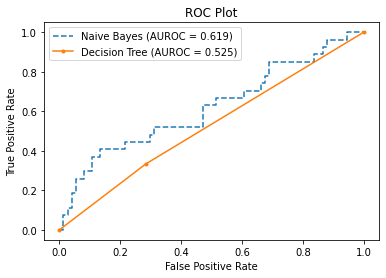

In [36]:
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

NAIVE BAYERS CLASSIFICATION
Testing Score
Naive Bayers Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        74
           1       0.53      0.30      0.38        27

    accuracy                           0.74       101
   macro avg       0.66      0.60      0.61       101
weighted avg       0.71      0.74      0.72       101

DECISION TREE CLASSIFIER
Testing Score
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        74
           1       0.31      0.33      0.32        27

    accuracy                           0.62       101
   macro avg       0.53      0.53      0.53       101
weighted avg       0.63      0.62      0.63       101

Decision Tree AUROC = 0.5315315315315315
Naive Bayes AUROC = 0.6191191191191191


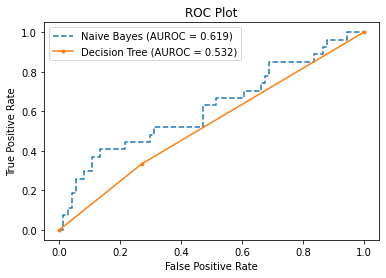

In [37]:
import pandas as pd

df = pd.read_csv('haberman.csv',header=None)

df.head()
df.isnull().sum()

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df[3]

df[3]=le.fit_transform(df[3])
df[3]

from sklearn.model_selection import train_test_split

X=df.drop(columns=[3])
y=df[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("NAIVE BAYERS CLASSIFICATION")

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)
print("Testing Score")
nb.score(X_test,y_test)
y_pred = nb.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report

print("Naive Bayers Confusion Matrix")
confusion_matrix(y_test,y_pred)
print("Classification Report")
print(classification_report(y_test,y_pred))

X=df.drop(columns=[3])
y=df[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("DECISION TREE CLASSIFIER")
from sklearn import tree
dt = tree.DecisionTreeClassifier()

dt.fit(X_train,y_train)

print("Testing Score")
dt.score(X_test,y_test)

y_pred_dt = dt.predict(X_test)

print(classification_report(y_test,y_pred_dt))
confusion_matrix(y_test,y_pred_dt)

nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

from sklearn.metrics import roc_curve, roc_auc_score

nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

import matplotlib.pyplot as plt

plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

